https://www.youtube.com/watch?v=e6C1Z-o1fyQ&list=PLv6MQO1ZzdmqKVL03HnslbBCDEoqS78Nm&index=9

# Comparisons, Masks, and Boolean Logic

In [1]:
import numpy as np

## Comparison Operators as ufuncs

In [2]:
x = np.arange(-3, 5)
x

array([-3, -2, -1,  0,  1,  2,  3,  4])

#### Create a boolean mask of x for values less than or equal to 2

In [3]:
x <= 2

array([ True,  True,  True,  True,  True,  True, False, False])

#### Create a boolean mask of x for values equal to -1

In [4]:
x == -1

array([False, False,  True, False, False, False, False, False])

#### Create a boolean mask of x for all positive values

In [5]:
x > 0

array([False, False, False, False,  True,  True,  True,  True])

#### Create a boolean mask of x for all even values

Remember: a value n is even if n % 2 = 0 and odd if n % 2 = 1

In [8]:
print(x % 2 == 0)

# test lambda function
even = lambda x: x % 2 == 0
print(even(x))

[False  True False  True False  True False  True]
[False  True False  True False  True False  True]


Remember: as with arithmetic operators, comparison operators alias a NumPy ufunc. Those ufuncs are listed below

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

## Boolean Arrays as Masks

In [9]:
rand = np.random.RandomState(0) # this is like setting a random seed
x = rand.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

#### Create a boolean mask 'greater' of x for values greater than 4. Create an array of x for values greater than four using a masking operation

In [10]:
greater = x > 4
x[greater]
# x[x > 4]

array([5, 7, 9, 5, 7, 6])

#### Create a boolean mask 'odd' of x for all odd values. Create an array of x for those odd values using a masking operation

In [11]:
x[x % 2 == 1]

array([5, 3, 3, 7, 9, 3, 5, 7])

#### Create an array of x containing all values that are greater than 4 and are not odd using boolean operators and a masking operation

Remember: boolean masks can be combinded using boolean operators. e.g (-2 <= x) & (x <= 3) is an mask for values of x between -2 and 3

In [12]:
x[(x > 4) & (x % 2 == 0)]

array([6])

## Example: Counting Rainy Days

In [13]:
import pandas as pd

#### Import Data

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
%cd /content/drive/MyDrive/DS All Along/NumPy
rainfall = pd.read_csv('seattle_2014.csv')

In [52]:
rainfall.head()

,station,station_name,date,prcp,snwd,snow,tmax,tmin,awnd,wdf2,wdf5,wsf2,wsf5,wt01,wt05,wt02,wt03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [50]:
inches = rainfall['prcp'] / 254.0  # 1/10mm -> inches
inches.shape

(365,)

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

#### In the following section, we will calculate statistics about rainfall in Seattle

#### Plot the inches data using a histogram with 40 buckets

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

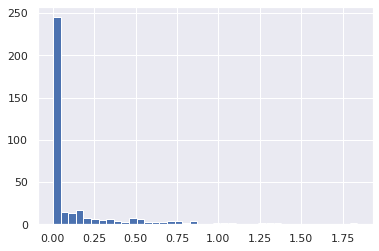

In [53]:
plt.hist(inches, 40)

#### As we can see above, the majority of days have no rainfall. To calculate statistics about rainy days we'll need to use a boolean mask

#### Create a boolean mask rainy for days with rainfall

In [56]:
rainyMask = inches > 0

#### For all days, print the median, mean, and standard deviation of rainfall

In [58]:
print(np.median(inches))
print(np.mean(inches))
print(np.std(inches))

0.0
0.1329737892352497
0.2666251761084922


#### For rainy days, print the median, mean, and standard deviation of rainfall

In [59]:
rainyDays = inches[rainyMask]
print(np.median(rainyDays))
print(np.mean(rainyDays))
print(np.std(rainyDays))

0.19488188976377951
0.3235695538057743
0.3336348441068411
